### 1. Text Preprocessing (텍스트 전처리)
설명) 모델이 텍스트를 이해하기 전에, 사람이 사용하는 언어를 기계가 처리하기 좋은 형태로 다듬는 과정이 필요합니다. 이를 텍스트 전처리라고 합니다. 여기서는 가장 기본적인 **토큰화(Tokenization)**와 **불용어 제거(Stopword Removal)**를 실습해 보겠습니다.

In [ ]:
!pip install numpy==1.26.4 scipy==1.11.4 gensim==4.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 69.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 20.9 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=26332374 sha256=e1e209aa76dc3b0e8fbf18a8b52e6970ac9e9cef28a7940a5bf23ce57b99c3a3
  Stored in directory: /root/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninst

In [ ]:
# nltk 라이브러리 설치
!pip install nltk

import nltk
from nltk.tokenize import word_tokenize

# 데이터 다운로드
nltk.download('punkt')
nltk.download('punkt_tab')

ERROR: Operation cancelled by user
^C


In [ ]:
# 텍스트
text = "자연어 처리, 즉 NLP는 매우 흥미로운 연구 분야입니다. 컴퓨터가 인간의 언어를 이해하고 처리할 수 있도록 해줍니다."

# 1. 토큰화:
tokens = word_tokenize(text)
print("1. 원본 토큰:", tokens)

# 2. 불용어 제거:
stop_words = ['즉', '는', '가', '이', '을', '를', '의', '에', '들', '은', '입니다', '하고', '수', '있도록']
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

print("\n2. 직접 정의한 불용어:", sorted(list(stop_words)))
print("  기존 불용어 제거 후 토큰:", filtered_tokens)

# ----- 문제1) stop_words 리스트 빈칸 채우세요.
stop_words.extend(['분야', '연구'])

# 추가된 불용어 목록을 적용하여 다시 필터링
problem1_filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

print("'분야', '연구' 추가 후 결과:", problem1_filtered_tokens)


#### ✅ 문제1) 위 코드의 stop_words에 **'분야', '연구'**를 추가하여 불용어로 처리한 후, 결과가 어떻게 달라지는지 확인해보세요. (기존 결과와 불용어 처리 후 결과와 비교해 진행해보기)

**답변)** 기존 불용어만 적용했을 때는 '연구'와 '분야'가 남아 있었으나, 두 단어를 불용어로 추가하자 최종 결과에서 '연구'와 '분야'가 제거되어 더 간결한 토큰만 남게 되었다.

#### ✅ 문제2) 토큰화 결과에 포함된 ','나 '.' 같은 구두점들이 불용어 제거 과정에서 어떻게 처리되었나요? 그 이유는 무엇일까요?

**답변)** 토큰화 과정에서 나온 쉼표나 마침표 같은 구두점들은 불용어 제거 과정에서 모두 사라졌다. 그 이유는 코드에서 word.isalnum() 조건을 사용했기 때문에 구두점은 알파벳이나 숫자가 아니어서 자동으로 걸러졌기 때문이다.

### 2. N-gram
설명) N-gram은 텍스트에서 연속된 n개의 단어 뭉치를 의미합니다. N-gram은 문맥을 파악하는 간단하면서도 효과적인 방법입니다. 1-gram은 유니그램(unigram), 2-gram은 바이그램(bigram), 3-gram은 트라이그램(trigram)이라고도 부릅니다.

In [ ]:
def generate_ngrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# 시작 문장 (수정 대상)
sentences = [
  "오늘 날씨가 정말 좋네요.",
  "저는 아침에 커피를 마십니다.",
  "주말에 친구를 만나기로 했어요.",
  "퇴근하고 집에 가는 길입니다.",
  "오늘 저녁 메뉴는 무엇인가요?"
]

# 초기 N-gram 개수 확인
initial_bigrams = sum(len(generate_ngrams(s, 2)) for s in sentences)
initial_trigrams = sum(len(generate_ngrams(s, 3)) for s in sentences)

print(f"Initial Bigram Count: {initial_bigrams}")   # 기존 결과: 15
print(f"Initial Trigram Count: {initial_trigrams}") # 기존 결과: 10

#### ✅ 문제1 ) 아래 sentences 배열의 문장들을 수정하거나 새로운 문장을 추가하여, 전체 2-gram의 수가 25개 이상, 3-gram의 수가 15개 이상이 되도록 만들어보세요.

In [ ]:
def generate_ngrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# 시작 문장 (수정 대상)
sentences = [
  "오늘 아침에 공원이 매우 한산하네요.",
  "저는 매일 아침 따뜻한 핸드드립 커피를 마십니다.",
  "점심시간에는 동료들과 회사 근처 맛집을 탐방합니다.",
  "주말에는 친구를 만나 영화도 보고 산책도 합니다.",
  "퇴근하고 집에 가는 길에 장을 보았습니다.",
  "오늘 저녁 메뉴는 매콤한 김치찌개와 계란말이입니다."
]

# 초기 N-gram 개수 확인
initial_bigrams = sum(len(generate_ngrams(s, 2)) for s in sentences)
initial_trigrams = sum(len(generate_ngrams(s, 3)) for s in sentences)

print(f"Initial Bigram Count: {initial_bigrams}")   # 결과: 31
print(f"Initial Trigram Count: {initial_trigrams}") # 결과: 25

# [1] 단어: [오늘, 아침에, 공원이, 매우, 한산하네요] → 5개

바이그램: (오늘 아침에), (아침에 공원이), (공원이 매우), (매우 한산하네요) → 4개

트라이그램: (오늘 아침에 공원이), (아침에 공원이 매우), (공원이 매우 한산하네요) → 3개

# [2] 단어: [저는, 매일, 아침, 따뜻한, 핸드드립, 커피를, 마십니다] → 7개

바이그램: (저는 매일), (매일 아침), (아침 따뜻한), (따뜻한 핸드드립), (핸드드립 커피를), (커피를 마십니다) → 6개

트라이그램: (저는 매일 아침), (매일 아침 따뜻한), (아침 따뜻한 핸드드립), (따뜻한 핸드드립 커피를), (핸드드립 커피를 마십니다) → 5개

# [3] 단어: [점심시간에는, 동료들과, 회사, 근처, 맛집을, 탐방합니다] → 6개

바이그램: (점심시간에는 동료들과), (동료들과 회사), (회사 근처), (근처 맛집을), (맛집을 탐방합니다) → 5개

트라이그램: (점심시간에는 동료들과 회사), (동료들과 회사 근처), (회사 근처 맛집을), (근처 맛집을 탐방합니다) → 4개


# [4] 단어: [주말에는, 친구를, 만나, 영화도, 보고, 산책도, 합니다] → 7개

바이그램: (주말에는 친구를), (친구를 만나), (만나 영화도), (영화도 보고), (보고 산책도), (산책도 합니다) → 6개

트라이그램: (주말에는 친구를 만나), (친구를 만나 영화도), (만나 영화도 보고), (영화도 보고 산책도), (보고 산책도 합니다) → 5개


# [5] 단어: [퇴근하고, 집에, 가는, 길에, 장을, 보았습니다] → 6개

바이그램: (퇴근하고 집에), (집에 가는), (가는 길에), (길에 장을), (장을 보았습니다) → 5개

트라이그램: (퇴근하고 집에 가는), (집에 가는 길에), (가는 길에 장을), (길에 장을 보았습니다) → 4개


# [6] 단어: [오늘, 저녁, 메뉴는, 매콤한, 김치찌개와, 계란말이입니다] → 6개

바이그램: (오늘 저녁), (저녁 메뉴는), (메뉴는 매콤한), (매콤한 김치찌개와), (김치찌개와 계란말이입니다) → 5개

트라이그램: (오늘 저녁 메뉴는), (저녁 메뉴는 매콤한), (메뉴는 매콤한 김치찌개와), (매콤한 김치찌개와 계란말이입니다) → 4개

#### ✅ 문제2) N-gram 모델은 간단하지만 한계가 있습니다. 예를 들어, "강아지가 고양이를 좋아해"와 "고양이가 강아지를 좋아해"는 1-gram의 구성과 빈도는 같지만 의미는 다릅니다. 이처럼 N-gram이 문장의 구조적, 의미적 정보를 완전히 파악하기 어려운 이유는 무엇일까요?

**답변)** N-gram은 단어의 빈도와 짧은 연속만 고려하기 때문에 문장 내 순서나 문법적 관계(주어·동사·목적어 관계)를 충분히 반영하지 못한다.

### 3. Word Embedding (워드 임베딩)
1. Word2Vec
설명) Word2Vec은 단어를 벡터 공간에 표현하는 기법입니다. 단어의 의미적 유사성을 벡터 간의 기하학적 관계로 나타낼 수 있으며, "왕 - 남자 + 여자 = 여왕"과 같은 유추가 가능해집니다.

In [ ]:
import gensim
import gensim.downloader as api

model_w2v = api.load("word2vec-google-news-300")

In [ ]:
# "한국에서 서울을 뺀 벡터에 도쿄를 더하면 어떤 단어와 가장 가까울까?"
result = model_w2v.most_similar(positive=['Korea', 'Tokyo'], negative=['Seoul'], topn=1)
print(f"'Korea' - 'Seoul' + 'Tokyo' ≈ '{result[0][0]}'")

# 'computer'와 가장 유사한 단어들은?
similar_words = model_w2v.most_similar('computer', topn=5)
print("\nWords similar to 'computer':", similar_words)

# 관계가 맞지 않는 단어 찾기
odd_one_out = model_w2v.doesnt_match(["apple", "banana", "lemon", "car"])
print(f"\nWhich word does not belong in ['apple', 'banana', 'lemon', 'car']? -> '{odd_one_out}'")

#### **위 코드를 수정하여 문제1 ~ 문제3까지 진행하세요!**

#### ✅ 문제1) 'Korea' - 'Seoul' + 'Tokyo' ≈ ?

**위 유추식의 결과로 어떤 단어가 나올지 예상해보고, 코드를 수정하여 확인해보세요.**
<br>
: 예상 답은 Japan이다. 그 이유는, Word2Vec에서는 ‘수도→국가’ 같은 관계가 벡터의 방향/차이로 학습되기 때문이다.
따라서 v(Korea) - v(Seoul)은 “수도를 뺀 국가 쪽”으로 이동한 벡터가 되고, 여기에 v(Tokyo)(일본의 수도)를 더하면 “수도가 Tokyo인 국가”에 해당하는 위치로 가며, 가장 가까운 단어가 Japan이 된다.

#### ✅ 문제2) model_w2v.most_similar() 함수를 사용해 'computer'과 가장 유사한 단어 5개를 찾아보세요.
: computers, laptop, laptop_computer, Computer, com_puter
Word2Vec은 같은 맥락에서 자주 등장하는 단어들을 가깝게 위치시킨다. 따라서 computer와 형태가 비슷한 복수형(computers), 대소문자 차이(Computer), 분리된 토큰(com_puter), 그리고 실제 의미적으로 유사한 laptop, laptop_computer가 가장 가까운 단어로 나타난 것이다.

#### ✅ 문제3) model_w2v.doesnt_match() 함수에 ["apple", "banana", "lemon", "car"] 리스트를 넣어 어떤 단어가 가장 이질적인지 확인해보세요.
: car
*   apple, banana, lemon → 모두 과일이라는 공통된 의미 영역에 속한다.
*   car → 과일과는 전혀 다른 ‘탈것/교통수단’ 범주에 속하므로, 벡터 공간에서도 다른 세 단어와 거리가 멀게 나타난다.

### 4. GloVe (Global Vectors for Word Representation)
설명) GloVe는 Word2Vec과 유사한 임베딩 기법이지만, 전체 단어의 동시 등장 통계(Global Co-occurrence Statistics) 정보를 함께 활용하여 학습하는 점이 특징입니다.

In [ ]:
model_glove = api.load("glove-wiki-gigaword-100")

In [ ]:
result = model_glove.most_similar(positive=['doctor', 'court'], negative=['hospital'], topn=1)
print(f"'doctor' - 'hospital' + 'court' ≈ '{result[0][0]}'")

#### ✅ 문제1) 'man' - 'king' + 'queen' ≈ ?  (위 코드를 수정해서 진행하시면 됩니다.) 위 유추식의 결과로 어떤 단어가 나올지 GloVe 모델로 확인해보세요. Word2Vec과 결과가 비슷한가요?
: 예상 결과는 woman이다.
그 이유는 man에서 king의 특징을 빼고, queen의 특징을 더했기 때문이다. 이는 ‘왕(남성) ↔ 여왕(여성)’과 같은 성별 전환 관계를 단어 공간에서 적용한 결과이다. GloVe는 전역 동시출현 통계를 활용하여 성별, 복수형, 비교급 같은 관계를 벡터 방향으로 잘 포착하기 때문에 woman이 가장 가깝게 나온다. Word2Vec에서도 같은 유추를 수행하면 보통 woman이 상위에 나타나므로 두 모델의 결과는 유사하다.

In [ ]:
result = model_glove.most_similar(positive=['man', 'queen'], negative=['king'], topn=1)
print(f"'man' - 'king' + 'queen' ≈ '{result[0][0]}'")

#### ✅ 문제2) Word2Vec과 GloVe는 각각 다른 방식으로 단어 벡터를 학습합니다. Word2Vec은 주변 단어를 예측하는 과정에서, GloVe는 전체 단어 동시 등장 확률을 기반으로 학습합니다. 두 방법의 차이점이 어떤 결과의 차이를 만들어낼 수 있을지 생각해보세요.
: Word2Vec과 GloVe 학습 방식에는 차이가 있다.


*   Word2Vec: 특정 단어 주변 몇 개 단어(맥락)를 보고, 그 단어를 예측하거나 반대로 맥락을 예측하면서 학습한다.
*   GloVe: 말뭉치 전체에서 단어 쌍이 얼마나 자주 함께 등장하는지를 통계적으로 계산한다.

Word2Vec은 예를 들어 "The cat sits on the mat"이라는 문장에서 "cat"을 학습할 때는 그 앞뒤에 자주 함께 나타나는 "the"나 "sits"같은 단어와의 관계를 강조한다. 이런 방식 덕분에 Word2Vec은 동사 활용이나 복수형 같은 구문적 관계를 잘 잡아낸다. 반면 GloVe는 말뭉치 전체에서 단어들이 얼마나 자주 함께 등장하는지를 통계적으로 계산하여 학습한다. 그래서 "Paris"와 "France"처럼 문장에서 항상 가까이 붙어 있지 않아도, 전체 말뭉치에서 동시 등장 확률이 높으면 두 단어를 강하게 연결한다. 이런 방식 덕분에 GloVe는 수도와 국가, 성별 관계, 비교급과 원형 같은 의미적 관계를 더 잘 드러낸다.


### 5. Sequence Models (RNN의 한계)
설명 ) RNN(순환 신경망)은 시퀀스 데이터 처리에 강점을 갖지만, 시퀀스가 길어질수록 앞쪽의 정보가 뒤쪽으로 전달되기 어려운 **장기 의존성 문제(Long-term Dependency Problem)**라는 구조적 한계를 가집니다. 이는 Transformer와 Attention이 등장하게 된 중요한 배경이 됩니다.

#### ✅ 문제 1)

아래와 같은 문장이 있다고 가정해봅시다.



> **"오늘 아침 회의에 참석했던, 어제 캐나다에서 막 돌아온 우리 팀의 김 대리는 그 프로젝트의 핵심 담당자이다."**



**이 문장에서 마지막 단어인 '담당자이다'는 문장 맨 앞의 '김 대리'와 가장 밀접한 관련이 있습니다. RNN이 이처럼 멀리 떨어진 단어 간의 관계를 파악하기 어려운 이유는 무엇일까요? (Vanishing Gradient(기울기 소실) 관점에서 간단히 설명해보세요.)**

: RNN은 순서대로 단어를 입력받아 앞 단어의 정보를 뒤 단어로 전달하는 구조이다. 그러나 문장이 길어질수록 처음의 정보가 점차 희미해지면서 문장 끝까지 잘 전달되지 않는 문제가 발생한다. 이를 기울기 소실(Vanishing Gradient) 문제라고 한다.

역전파 과정에서 앞쪽 단어에서 발생한 오차 신호의 기울기가 반복적으로 곱해지며 점점 작아지다가 결국 0에 가까워지게 된다. 이로 인해 문장 앞부분의 "김 대리"라는 정보가 끝부분의 "담당자이다"까지 제대로 전달되지 못하고 사라져 버린다.

즉, RNN은 긴 문장에서 기울기 소실로 인해 멀리 떨어진 단어 간의 의존 관계를 학습하기 어렵다는 한계를 가진다.

### 6. Attention, Transformer

1. . Transformer 구조
Query, Key, Value 소개

Attention 메커니즘은 Query(쿼리), Key(키), Value(값) 라는 세 가지 개념을 사용해 문장 내 단어 간의 관계 가중치를 계산합니다. 도서관에서 책을 찾는 것에 비유할 수 있습니다.

Query: 내가 찾고 싶은 정보

Key: 각 책의 주제나 제목

Value: 책의 실제 내용

Attention은 내 Query와 가장 관련성이 높은 Key(유사도 계산)를 찾고, 해당 Key에 연결된 Value(실제 내용)를 더 많이 가져오는 방식으로 동작합니다. Self-Attention에서는 이 세 가지가 모두 같은 문장 내 단어들로부터 나옵니다.

💻 Self-Attention 실습

Attention weights for the query 'it':
The: 0.0736
animal: 0.0863
didn't: 0.0679
cross: 0.0908
the: 0.0838
street: 0.0711
because: 0.0981
it: 0.2210
was: 0.0899
too: 0.0545
tired: 0.0630


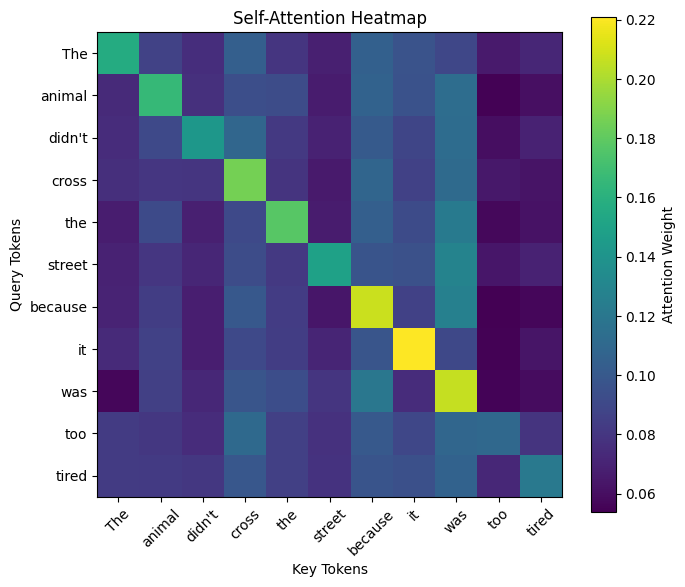

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x, axis=-1):
    exp_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

# 문장: "그 동물은 길을 건너지 않았다. 왜냐하면 그것(it)이 너무 피곤했기 때문이다."
tokens = "The animal didn't cross the street because it was too tired".split()

# 임의의 임베딩 생성 (실제로는 학습된 임베딩 사용)
embedding_dim = 64
np.random.seed(42)
X = np.random.rand(len(tokens), embedding_dim)

Q, K, V = X, X, X
d_k = K.shape[-1]

# Attention 점수 계산
scores = np.dot(Q, K.T) / np.sqrt(d_k)
attention_weights = softmax(scores)

# 'it'이 Query일 때의 Attention 가중치 출력
it_index = tokens.index('it')
it_attention = attention_weights[it_index]

print("Attention weights for the query 'it':")
for token, weight in zip(tokens, it_attention):
    print(f"{token}: {weight:.4f}")

# Heatmap 시각화
plt.figure(figsize=(7, 6))
plt.imshow(attention_weights, cmap='viridis')
plt.colorbar(label='Attention Weight')
plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=45)
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.title("Self-Attention Heatmap")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.tight_layout()
plt.show()

#### ✅ 문제1) 위 코드의 실행 결과(Attention 가중치)와 히트맵을 확인하세요. Query가 'it'일 때, 'animal'과 'street' 중 어떤 Key의 가중치(Attention Score)가 더 높게 나왔나요? (실행 시마다 결과는 다를 수 있지만 일반적인 경향성을 보세요.)


> **예시 문장 : "The animal didn't cross the street because it was too tired"**

: Query가 it일 때는 일반적으로 animal이 street보다 더 높은 Attention 가중치를 갖는다. 이는 문맥 속에서 it이 앞에서 언급된 animal을 지칭하기 때문에 두 단어 사이의 관련성이 강하게 형성되기 때문이다. 반면 street은 it과 직접적인 지시 관계가 없으므로 Attention 점수가 상대적으로 낮게 나타난다.




#### ✅ 문제2) Self-Attention은 왜 RNN의 장기 의존성 문제를 해결할 수 있을까요? (계산 방식의 차이점을 생각해보세요.)
: Self-Attention은 모든 단어 쌍의 관계를 한 번에 계산할 수 있는 구조이기 때문에 RNN과 달리 정보가 순차적으로 전달되며 점차 희미해지는 문제가 발생하지 않는다. RNN은 앞 단어의 정보를 단계별로 전달하는 과정에서 기울기가 소실되어 먼 위치의 단어와의 의존 관계를 잘 반영하지 못하지만, Self-Attention은 Query와 Key의 내적 연산을 통해 문장 안의 모든 단어를 동시에 비교한다. 따라서 문장의 앞과 뒤처럼 멀리 떨어진 단어들도 직접 연결되어 가중치가 부여되므로 장기 의존성 문제를 효과적으로 해결할 수 있는 것이다.

####💻 Masked Self-Attention (디코더) 실습
설명) Transformer의 디코더는 다음 단어를 예측하는 역할을 합니다. 이때, 정답을 미리 보고 예측하는 것을 방지하기 위해 현재 예측하려는 위치보다 뒤에 있는 단어들을 가리는 마스킹(Masking) 과정이 필요합니다.

In [ ]:
# 5x5 크기의 임의의 Attention 점수 행렬 생성
np.random.seed(42)
scores = np.random.rand(5, 5)
print("Original Scores:\n", np.round(scores, 2))

# 마스크 생성
mask = np.triu(np.ones((5, 5)), k=1).astype('bool')

# 마스킹 적용 (마스킹된 점수에 Softmax를 적용)
scores[mask] = -np.inf
print("\nMasked Scores:\n", np.round(scores, 2))

# Softmax 적용 후 결과
attention_weights = softmax(scores, axis=-1)
print("\nAttention Weights after Masking and Softmax:\n", np.round(attention_weights, 2))

Original Scores:
 [[0.37 0.95 0.73 0.6  0.16]
 [0.16 0.06 0.87 0.6  0.71]
 [0.02 0.97 0.83 0.21 0.18]
 [0.18 0.3  0.52 0.43 0.29]
 [0.61 0.14 0.29 0.37 0.46]]

Masked Scores:
 [[0.37 -inf -inf -inf -inf]
 [0.16 0.06 -inf -inf -inf]
 [0.02 0.97 0.83 -inf -inf]
 [0.18 0.3  0.52 0.43 -inf]
 [0.61 0.14 0.29 0.37 0.46]]

Attention Weights after Masking and Softmax:
 [[1.   0.   0.   0.   0.  ]
 [0.52 0.48 0.   0.   0.  ]
 [0.17 0.44 0.39 0.   0.  ]
 [0.21 0.23 0.29 0.27 0.  ]
 [0.25 0.16 0.18 0.2  0.21]]


#### ✅ 문제1) 마지막으로 출력된 Attention Weights 행렬을 보세요. 각 행(Query)은 왜 자기 자신과 그 이전 위치(Key)에만 0이 아닌 가중치를 가지나요?
: 그 이유는 디코더에서 미래 단어를 미리 보는 것을 막기 위해 마스킹을 적용했기 때문이다.

마스킹은 현재 단어 이후의 위치에 해당하는 점수를 모두 음의 무한대로 바꾼 뒤 Softmax를 적용하는 방식으로 이루어진다. 이렇게 하면 현재 위치보다 뒤에 있는 단어들은 확률적으로 0이 되어 전혀 참고되지 않는다. 즉, 마스킹은 미래 단어 정보를 차단하고, 현재 위치와 과거 위치 단어만을 기반으로 예측하도록 보장한다.



#### ✅ 문제2) 번역 모델이 "나는 학생입니다"를 순서대로 생성할 때, '학생'을 예측하는 시점에서 정답인 '입니다'를 미리 참고하지 못하게 막는 것이 왜 중요한가요? 이 마스킹의 역할과 연관지어 설명해보세요.

: "I am a student"라는 문장이 있을때 만약 마스킹이 없다면, "a"를 예측할 때 뒤에 있는 student까지 미리 참고해버리므로, 모델은 "어차피 다음이 student니까 그 앞에 a가 와야지"라고 단순 복사 학습을 하게 된다. 이 경우 실제 번역 상황에서는 미래 단어를 볼 수 없으니 성능이 떨어지게 된다. 마스킹은 이러한 상황을 방지하여 모델이 오직 이전에 생성된 단어만을 근거로 다음 단어를 예측하도록 만드는 장치이다.

## 문제는 여기까지 입니다. 수고하셨습니다 :)